# Heavy Traffic Indicators on I-94 Project

In this project we are going to explore the heavy traffic indicators on the Interstate 94 Highway westbound traffic data set ([data set documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)) using different data visualization techniques.
The goal of the analysis is to determine a few indicators of heavy traffic on I-94.
![image](traffic1.jpg)

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
print(traffic.head(5))
print(traffic.tail(5))
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Observations of Traffic Volume

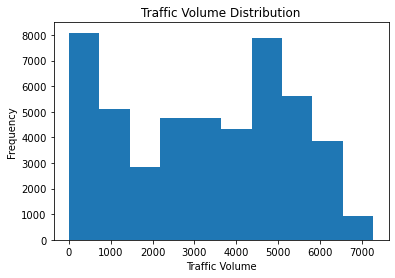

In [4]:
traffic['traffic_volume'].plot.hist()
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The `traffic_volume` variable seems to be bimodal, where there is a peak around 0-1000 cars and also around 5000 cars.  Possibly this is due to different times of the day (day and night) The average traffic volume is about 3260 cars.

## Day vs Night Traffic Volume

In [6]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
daytime = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(daytime.shape)
nighttime = traffic.copy()[(traffic['date_time'].dt.hour >=19) | (traffic['date_time'].dt.hour < 7)]
print(nighttime.shape)

(23877, 9)
(24327, 9)


There is a significant difference in number of row numbers between daytime and nighttime.

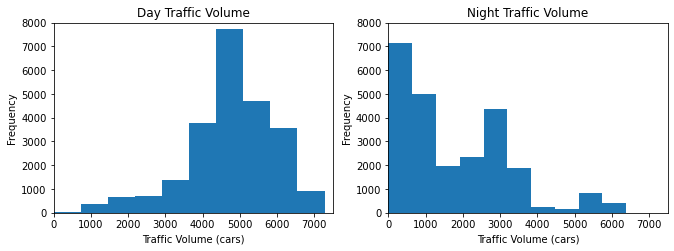

In [7]:
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
daytime['traffic_volume'].plot.hist()
plt.title('Day Traffic Volume')
plt.xlabel('Traffic Volume (cars)')
plt.ylabel('Frequency')
plt.xlim([0,7500])
plt.ylim([0,8000])

plt.subplot(1,2,2)
nighttime['traffic_volume'].plot.hist()
plt.title('Night Traffic Volume')
plt.xlabel('Traffic Volume (cars)')
plt.ylabel('Frequency')
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.show()

In [8]:
print(daytime['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [9]:
print(nighttime['traffic_volume'].describe())

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


## Time Indicators

In [10]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

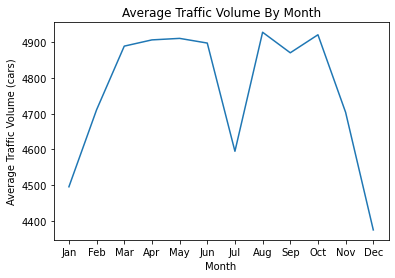

In [11]:
by_month['traffic_volume'].plot.line()
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],
          labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Average Traffic Volume By Month')
plt.ylabel('Average Traffic Volume (cars)')
plt.xlabel('Month')
plt.show()

Traffic is significantly less in July for some reason.

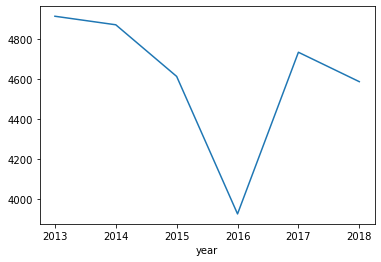

In [12]:
daytime['year'] = daytime['date_time'].dt.year
only_july = daytime[daytime['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Seems that in 2016 there is a significant drop in traffic, but other years, July was fairly high traffic.

## Average Traffic Volume By Day of the Week

In [13]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

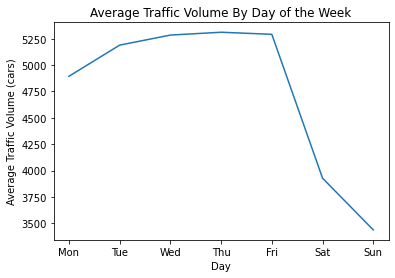

In [14]:
by_dayofweek['traffic_volume'].plot.line()
plt.xticks(ticks=[0,1,2,3,4,5,6],
          labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Average Traffic Volume By Day of the Week')
plt.ylabel('Average Traffic Volume (cars)')
plt.xlabel('Day')
plt.show()

Seems to be less traffic on weekends, which makes sense

## Average Traffic Volume by Time of Day

In [15]:
daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


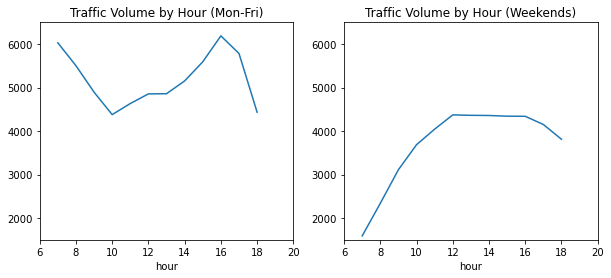

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour (Mon-Fri)')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour (Weekends)')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()

Seems like traffic is highest at 7 am and 4 pm during business days which seems to correspond with the commuting hours.  Also, for the weekends, the traffic is highest from noon to 4 pm.

## Weather Effects on Traffic

In [18]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

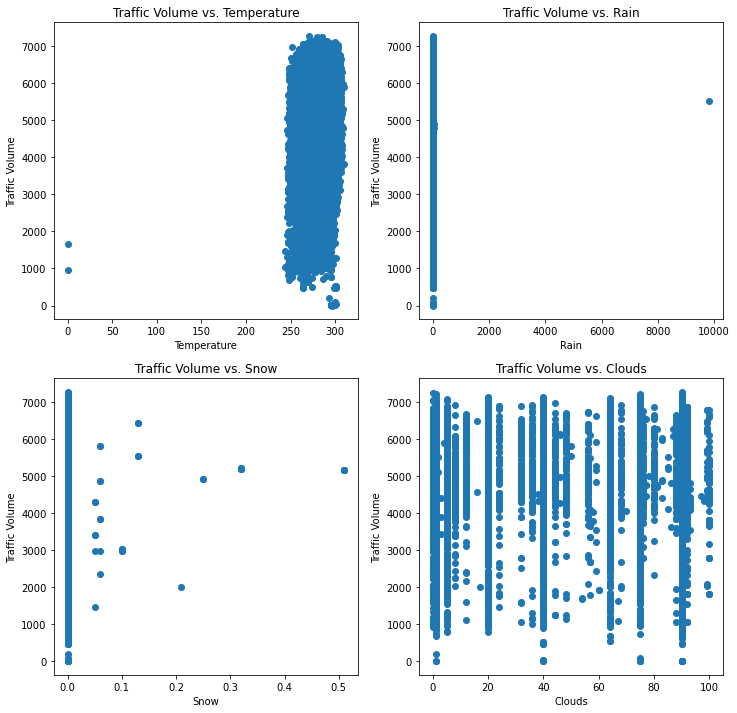

In [22]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.scatter(daytime['temp'],daytime['traffic_volume'])
plt.title('Traffic Volume vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')

plt.subplot(2,2,2)
plt.scatter(daytime['rain_1h'],daytime['traffic_volume'])
plt.title('Traffic Volume vs. Rain')
plt.xlabel('Rain')
plt.ylabel('Traffic Volume')

plt.subplot(2,2,3)
plt.scatter(daytime['snow_1h'],daytime['traffic_volume'])
plt.title('Traffic Volume vs. Snow')
plt.xlabel('Snow')
plt.ylabel('Traffic Volume')

plt.subplot(2,2,4)
plt.scatter(daytime['clouds_all'],daytime['traffic_volume'])
plt.title('Traffic Volume vs. Clouds')
plt.xlabel('Clouds')
plt.ylabel('Traffic Volume')

plt.show()
           

Even though temperture has the highest correlation with traffic volume, it doesn't look like it has that strong of an effect on traffic volume.

## Weather Types

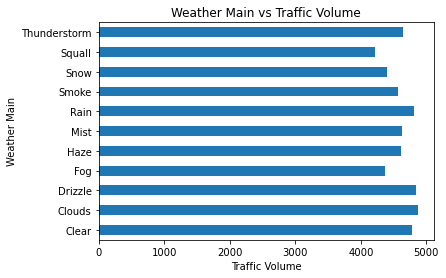

In [29]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.title('Weather Main vs Traffic Volume')
plt.ylabel('Weather Main')
plt.xlabel('Traffic Volume')
plt.show()

There doesn't seem to be a huge difference in traffic volumes by weather mains.

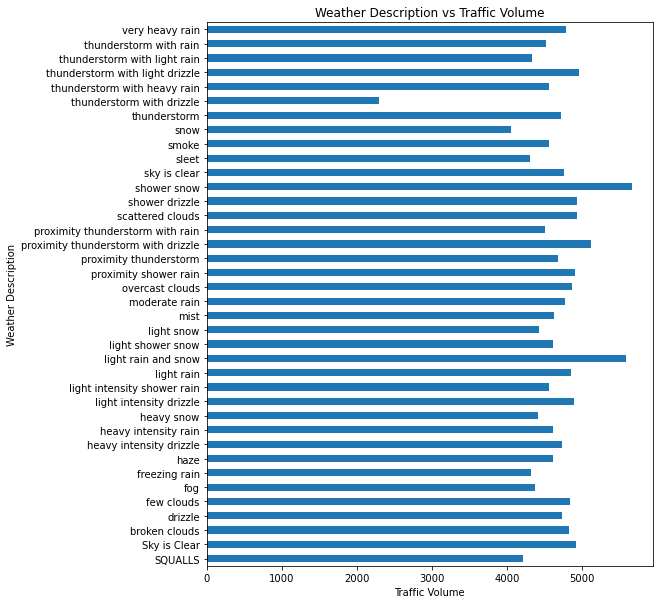

In [32]:
by_weather_description['traffic_volume'].plot.barh(figsize=(8,10))
plt.title('Weather Description vs Traffic Volume')
plt.ylabel('Weather Description')
plt.xlabel('Traffic Volume')
plt.show()

There seems to be a spike in traffic volume during `shower snow` and during `light rain and snow`